In [49]:
# import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [50]:
# loading the dataset
data = pd.read_csv('/content/Position_Salaries.csv')

In [51]:
print(data)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [52]:
# display the first five rows of the dataset
print(data.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [53]:
# display the last five rows of the dataset
print(data.tail())

         Position  Level   Salary
5  Region Manager      6   150000
6         Partner      7   200000
7  Senior Partner      8   300000
8         C-level      9   500000
9             CEO     10  1000000


In [54]:
# display the shape of the dataset
print(data.shape)

(10, 3)


In [55]:
# depict all the necessary information for the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None


In [56]:
# depict the statistical information about the dataset
print(data.describe())

          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


In [57]:
# divide the dataset into independent and dependent features

data_x = data.iloc[:,1:2].values
print(data_x)

data_y = data.iloc[:,2].values
print(data_y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


**As the dataset is very small, it cannot be divided into training and testing data.**

In [58]:
# perform feature scaling as the inputs are not in the same range

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

data_y = data_y.reshape(-1,1)

# transform the data
data_x = sc.fit_transform(data_x)

data_y = sc.fit_transform(data_y)



In [59]:
data_x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [60]:
data_y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

**USE SUPPORT VECTOR REGRESSOR ALGORITHM**

In [61]:
from sklearn.svm import SVR


# object
regressor = SVR(kernel = 'poly')


# train the model
regressor.fit(data_x, data_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

In [62]:
# predict the model
pred_y = regressor.predict(data_x)


In [63]:
print(pred_y)

[-2.30854906 -1.19571784 -0.56722767 -0.2846954  -0.20973785 -0.20397189
 -0.12901435  0.15351793  0.7820081   1.89483931]


**ACCURACY OF THE MODEL**

In [64]:
from sklearn.metrics import r2_score, confusion_matrix, classification_report

In [65]:
print(data_y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [66]:
print(pred_y)

[-2.30854906 -1.19571784 -0.56722767 -0.2846954  -0.20973785 -0.20397189
 -0.12901435  0.15351793  0.7820081   1.89483931]


In [67]:
pred_y = pred_y.reshape(-1,1)

In [68]:
print(pred_y)

[[-2.30854906]
 [-1.19571784]
 [-0.56722767]
 [-0.2846954 ]
 [-0.20973785]
 [-0.20397189]
 [-0.12901435]
 [ 0.15351793]
 [ 0.7820081 ]
 [ 1.89483931]]


In [69]:
ac = r2_score(pred_y, data_y)


In [70]:
print("Accuracy of the Model is:", (ac * 100.0))

Accuracy of the Model is: 67.94045387239707


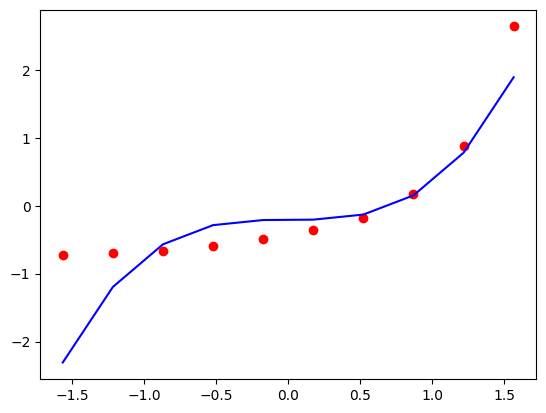

In [72]:
plt.scatter(data_x,data_y,color='red')
plt.plot(data_x,regressor.predict(data_x),color='blue')